<a href="https://colab.research.google.com/github/dinaOuahbi/Machine-learning-with-python/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

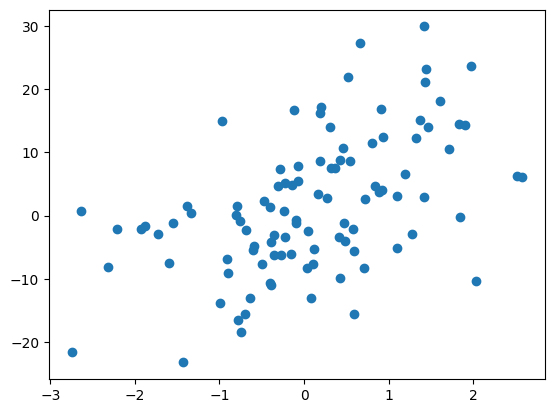

In [3]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [4]:
print(
    x.shape,
    y.shape
)

(100, 1) (100,)


In [7]:
y = y.reshape(x.shape[0], 1)

In [8]:
y.shape

(100, 1)

In [10]:
# matrice X
X = np.hstack((x, np.ones((x.shape))))
X.shape

(100, 2)

In [14]:
# vecteur theta
# initialiser theta
theta = np.random.rand(2,1)
theta

array([[0.56657978],
       [0.04811235]])

In [15]:
# model F = X.theta
def model(X, theta):
  return X.dot(theta)

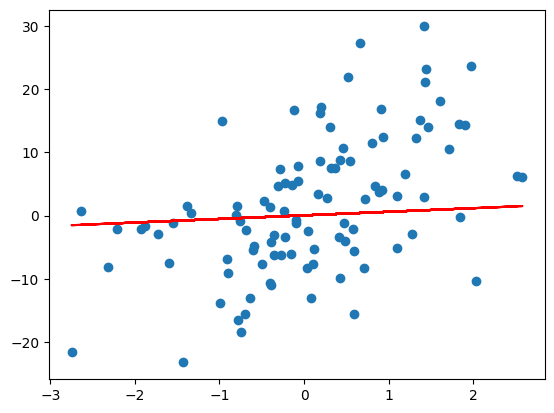

In [20]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='red') # courbe ascendante car on a un param a positive

In [21]:
# Fonction cout : erreur quadratique moyenne
def cost_function(X, y, theta):
  m = len(y)
  return 1/(2*m) * np.sum((model(X, theta) - y)**2)


In [22]:
cost_function(X, y, theta)

55.31311388501307

In [23]:
# descente du gradient
def grad(X, y, theta):
  m = len(y)
  return 1/m * X.T.dot(model(X, theta) - y)

In [32]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
  cost_history = np.zeros(n_iterations)
  for i in range(0, n_iterations):
    theta = theta - learning_rate * grad(X, y, theta)
    cost_history[i] = cost_function(X, y, theta)
  return theta, cost_history

In [35]:
# Train
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [36]:
theta_final

array([[5.00000819],
       [1.23294136]])

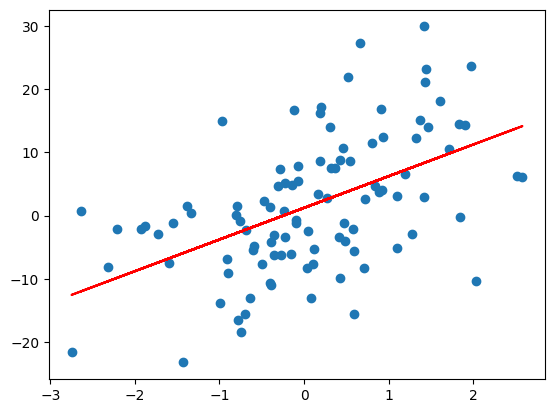

In [31]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='red')

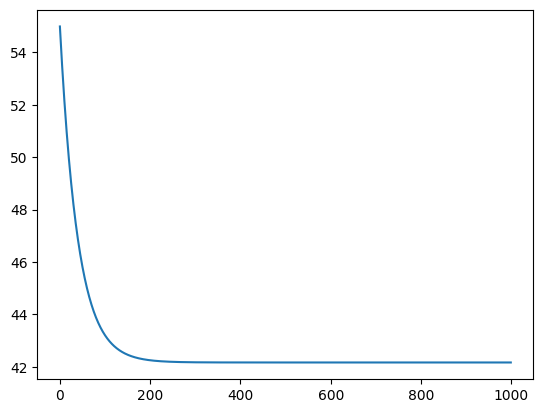

In [37]:
plt.plot(range(1000), cost_history)

In [38]:
# coef de determination
def coef_determination(y, pred):
  u = ((y-pred)**2).sum()
  v = ((y-y.mean())**2).sum()
  return 1 - u/v

In [39]:
coef_determination(y, predictions)

0.26454989757789993